Proyecto Final Grupo 15

# Funciones auxiliares

In [ ]:
'''
This function receives a string with the filename of the image to read,
and a flag indicating if we want to read it in color/RGB (flagColor=1) or gray level (flagColor=0)

Example of use:
im1=readIm(get_image('apple.jpg'),0)

'''
def readIm(filename, flagColor=1):
  # cv2 reads BGR format
  im=cv2.imread(filename)
  # change to  RGB and return the image
  if(flagColor):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # change from BGR to grayscale instead if flag is 0
  return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [ ]:
'''
This function receives an array of arbitrary real numbers (that could include even negative values),
and returns an 'image' in the range [0,1].
flag_GLOBAL allows the user to normalize the whole image (including all channels) or to normalize
each channel/band independently.
'''
def rangeDisplay01(im, flag_GLOBAL= True):
  im = im.astype(float)
  if flag_GLOBAL:
    im = (im - im.min())/(im.max() - im.min())
  else:
    # bands normalization
    for band in range(im.shape[2]):
      im[:, :, band] = (im[:, :, band] - im[:, :, band].min())/(im[:, :, band].max() - im[:, :, band].min())
      # Note: remember that, for plt.imshow with RGB data, the valid range is [0..1] for floats and [0..255] for integers.
  return im

'''
This function displays multiple images (including a title and using a magnification factor)
of equal size. The input to the function is a list of images.

Example of use:
im1=readIm(get_image('apple.jpg'),1)
images = [im1,im1,im1]

displayMI_ES(images, title='Manzanas',factor=1)

'''
def displayMI_ES(vim, title='Result',factor=2):
  # We set the maximun number of images to concatenate by columns
  maxcolumns=3
  # number of images to display
  numberim=len(vim)
  # The simplest case, one row: the maximum number of columns is larger than the images to stack
  # This is, by default, we put together the images column-wise
  if len(vim) < maxcolumns:
    out=vim[0]
    for item in range(1,len(vim)):
      #displayIm(out,str(item),1)
      out=np.hstack((out,vim[item]))

  # Else, if maxcolumns is smaller or equal than the number of images to stack
  else:
    # We check if all rows and columns are going to be 'busy', or if otherwise we need an extra-row
    if np.mod(len(vim),maxcolumns)== 0:
      maxrows=numberim//maxcolumns
    else:
      maxrows=numberim//maxcolumns+1

    # we build up the first block-row
    out=vim[0]
    for item in range(1,maxcolumns):
      out=np.hstack((out,vim[item]))
    # We build up the rest of block-rows
    for block in range(1,maxrows):
      #print(block)
      row=vim[block*maxcolumns]
      for item in range(1,maxcolumns):
        # We still have images to stack
        if block*maxcolumns+item < numberim:
          row=np.hstack((row,vim[block*maxcolumns+item]))
        # We do not have more images, and we have to fill with black
        else:
          row=np.hstack((row,np.zeros(vim[0].shape,dtype=vim[0].dtype)))
          #print(row.dtype)
          # if we don't include ',dtype=vim[0].dtype', np.zeros will include float
          # numbers in the matrix. This will make that the whole matrix will be
          # considered as floats, and values larger than 1 will be clipped to 1,
          # displaying an almost totally white image
      # add the new block-row
      out=np.vstack((out,row))
  return displayIm(out,title,factor)

In [ ]:
'''
This function displays a single image, including a title, using a magnification factor.

Example of use:
im1=readIm(get_image('apple.jpg'),0)
displayIm(im1,'Manzana',0.5)

'''
def displayIm(im, title='Result',factor= 2):
  # First normalize range
  max=np.max(im)
  min=np.min(im)
  if min<0 or max>255:
    im=rangeDisplay01(im,flag_GLOBAL=True)
  if len(im.shape) == 3:
    # im es tribanda
    plt.imshow(im, cmap='jet')
  else:
    # im es monobanda
    plt.imshow(im, cmap='gray')
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title)
  plt.xticks([]), plt.yticks([]) # eliminamos numeración
  plt.show()

In [ ]:
'''
This function displays multiple images (including a title and using a magnification factor)
of equal size. The input to the function is a list of images.

Example of use:
im1=readIm(get_image('apple.jpg'),1)
images = [im1,im1,im1]

displayMI_ES(images, title='Manzanas',factor=1)

'''
def displayMI_ES(vim, title='Result',factor=2):
  # We set the maximun number of images to concatenate by columns
  maxcolumns=3
  # number of images to display
  numberim=len(vim)
  # The simplest case, one row: the maximum number of columns is larger than the images to stack
  # This is, by default, we put together the images column-wise
  if len(vim) < maxcolumns:
    out=vim[0]
    for item in range(1,len(vim)):
      #displayIm(out,str(item),1)
      out=np.hstack((out,vim[item]))

  # Else, if maxcolumns is smaller or equal than the number of images to stack
  else:
    # We check if all rows and columns are going to be 'busy', or if otherwise we need an extra-row
    if np.mod(len(vim),maxcolumns)== 0:
      maxrows=numberim//maxcolumns
    else:
      maxrows=numberim//maxcolumns+1

    # we build up the first block-row
    out=vim[0]
    for item in range(1,maxcolumns):
      out=np.hstack((out,vim[item]))
    # We build up the rest of block-rows
    for block in range(1,maxrows):
      #print(block)
      row=vim[block*maxcolumns]
      for item in range(1,maxcolumns):
        # We still have images to stack
        if block*maxcolumns+item < numberim:
          row=np.hstack((row,vim[block*maxcolumns+item]))
        # We do not have more images, and we have to fill with black
        else:
          row=np.hstack((row,np.zeros(vim[0].shape,dtype=vim[0].dtype)))
          #print(row.dtype)
          # if we don't include ',dtype=vim[0].dtype', np.zeros will include float
          # numbers in the matrix. This will make that the whole matrix will be
          # considered as floats, and values larger than 1 will be clipped to 1,
          # displaying an almost totally white image
      # add the new block-row
      out=np.vstack((out,row))
  return displayIm(out,title,factor)

# Conexión con drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys,os
%cd '/content/drive/My Drive'
get_image = lambda route: os.path.join('/content/drive/MyDrive/VC_FINAL/', route)

Mounted at /content/drive
/content/drive/My Drive


# Setup para la detección de instancias

(esto suele tardar unos 2-3 minutos en ejecutarse)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15303, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15303 (delta 9), reused 12 (delta 1), pack-reused 15275
Receiving objects: 100% (15303/15303), 6.18 MiB | 12.61 MiB/s, done.
Resolving deltas: 100% (11120/11120), done.
Updating files: 100% (820/820), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# ¿Cómo es el dataset?

Vamos a ver algunos ejemplos de imágenes que se encuentran en el dataset para justificar por qué puede ser beneficioso recortarlas. Después, analizaremos de qué forma podemos conseguirlo, qué problemas pueden surgir y cómo podemos abordarlos.

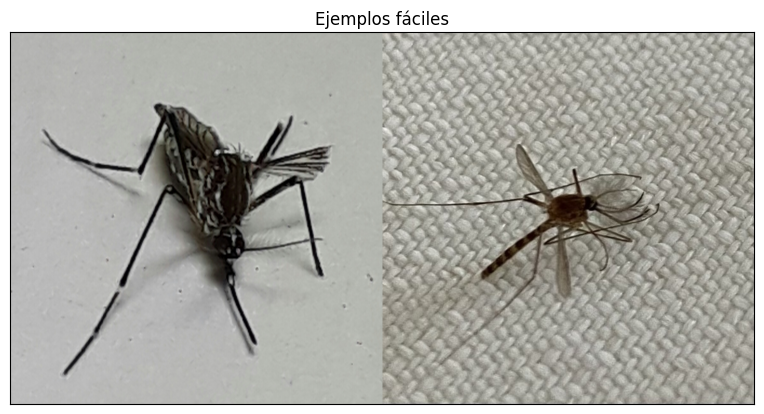

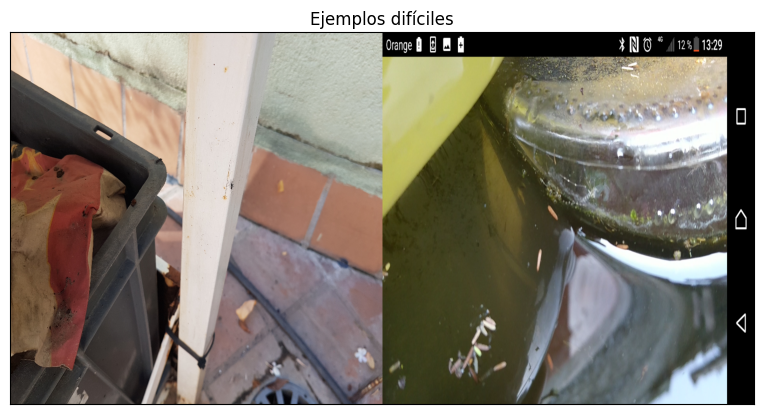

In [ ]:
#Las imágenes de los mosquitos se encuentran en 4 carpetas (una por clase):
# Files/Aedes_aegypti -> fotos del mosquito de la fiebre amarilla/mosquito africano
# Files/Aedes_albopictus -> fotos del mosquito tigre
# Files/Japonicus+Koreicus -> fotos de los mosquitos japonés y coreano
# Files/Culex -> fotos del mosquito común

# Algunas fotos son muy buenas para la clasificación tal y como están:
im1=readIm(get_image('Files/Aedes_aegypti/91e8a715-747a-4000-964a-1d48d36685bb.jpg'),1)
im2=readIm(get_image('Files/Culex/0b9bda03-9967-4b62-8d2f-59c8812167c5.jpg'),1)

im1 = cv2.resize(im1, (800, 800))
im2 = cv2.resize(im2, (800, 800))

# En estos ejemplos, se puede apreciar claramente el dibujo del tórax y los colores
# Además, se distingue al mosquito del fondo, por lo que no hay información
# extra (ruido) que pueda confundir al clasificador
displayMI_ES([im1, im2], "Ejemplos fáciles", 1.5)

# Lamentablemente, la mayoría de las imágenes no son así. Normalmente, el mosquito
# representa sólo una pequeña parte de la imagen. Se podría decir que hay más ruido
# que mosquito

im3=readIm(get_image('Files/Aedes_albopictus/0ad704ea-0d60-4f31-8e4a-3de560c6de7b.jpg'),1)
im4=readIm(get_image('Files/Japonicus+koreicus/Copia de 0ea87e93-90f4-476d-9ff1-750ff39c7585.png'),1)

im3 = cv2.resize(im3, (800, 800))
im4 = cv2.resize(im4, (800, 800))

# En estos ejemplos, hay muchos elementos en cada imagen. A veces es incluso difícil
# ver dónde está el mosquito a simple vista...
displayMI_ES([im3, im4], "Ejemplos difíciles", 1.5)

El dataset de mosquito alert contiene:
- 75 imágenes de aedes aegypti.
- 1029 imágenes de aedes albopictus.
- 211 imágenes de aedes japonicus y koreicus.
- 1016 imágenes de culex.

El hecho de que no dispongamos de muchos ejemplos puede suponer un problema en el entrenamiento de los modelos (además, acentuado por el desbalanceo de clases). Si a esto le sumamos la gran cantidad de ruido que presentan muchas de las imágnes, parece muy conveniente la idea de utilizar un modelo auxiliar que consiga recortar aquellos trozos de las fotografías que contengan a los mosquitos. De este modo, podríamos mejorar la calidad del dataset y la capacidad de clasificación del modelo final.

# El modelo de detección

Vamos a utilizar el modelo Mask R-CNN (https://ieeexplore.ieee.org/document/8237584) para recortar las imágenes. El repositorio con la implementación de dicho modelo puede encontrarse en https://github.com/facebookresearch/detectron2 , su documentación en https://detectron2.readthedocs.io/en/latest/index.html y un colab con ejemplos detallados de uso en https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5 .

De aquí en adelante, nos referiremos al modelo como Mask R-CNN o detectron2 de forma indistinta.

Mask R-CNN se construye sobre Faster R-CNN (https://arxiv.org/pdf/1506.01497.pdf), que es una red que es capaz de definir cajas para los objetos que hay en una imagen. Luego, clasifica estas regiones con la ayuda de otra red especializada en clasificación. El motivo por el cual usamos Mask R-CNN en lugar de simplemente Faster R-CNN es que los desarrolladores han dejado de trabajar en este modelo y las últimas implementaciones y mejoras de la red están incluidas en Mask R-CNN y la documentación más actualizada también se corresponde con dicho modelo.

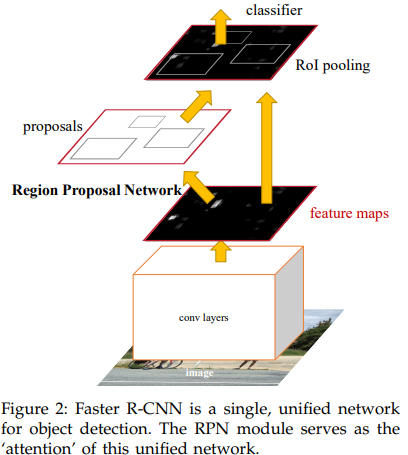


Mask R-CNN es capaz de definir una caja alrededor de los objetos que encuentra en la imagen. Nuestro objetivo es detectar a los mosquitos y utilizar la caja propuesta por el modelo para recortar las fotografías.

Sin embargo, hay un inconveniente importante: detectron2 no se ha entrenado para detectar mosquitos. Su dataset de entrenamiento (https://arxiv.org/pdf/1405.0312.pdf) contempla varios objetos como personas, bicicletas, pizzas... Pero no mosquitos. Es posible re-entrenar al modelo para que detecte mosquitos. Sin embargo, no disponemos de ningún dataset adecuado para dicho entenamiento y elaborar uno desde cero nos llevaría demasiado tiempo. Tampoco hemos encontrado otros modelos similares que sí puedan detectar mosquitos. No obstante, hay dos circunstancias de las cuales nos podemos aprovechar para poder hacer una detección razonablemente buena:

1. Detectron2 confunde habitualmente los mosquitos con objetos de otras clases (principalmente pájaros, pero también aviones o esquís).
2. En muchos ejemplos, se muestra al mosquito encima de la mano de una persona. Detectron2 detecta muy bien las manos de las personas, así que podemos recortarlas y el mosquito quedará dentro de la fotografía.

Vamos a ver qué resultados ofrece nuestro modelo con algunos ejemplos del dataset:

In [ ]:
#Primero, cargamos el modelo pre-entrenado
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Esta línea es muy importante: nos permite seleccionar un umbral de confianza para las detecciones
# Por ejemplo: 0.75 significa que sólo se considerarán las detecciones de objetos con un nivel de
# confianza mínimo del 75%
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
all_classes = metadata.thing_classes

predictor = DefaultPredictor(cfg)

[01/14 22:18:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 107MB/s]                           


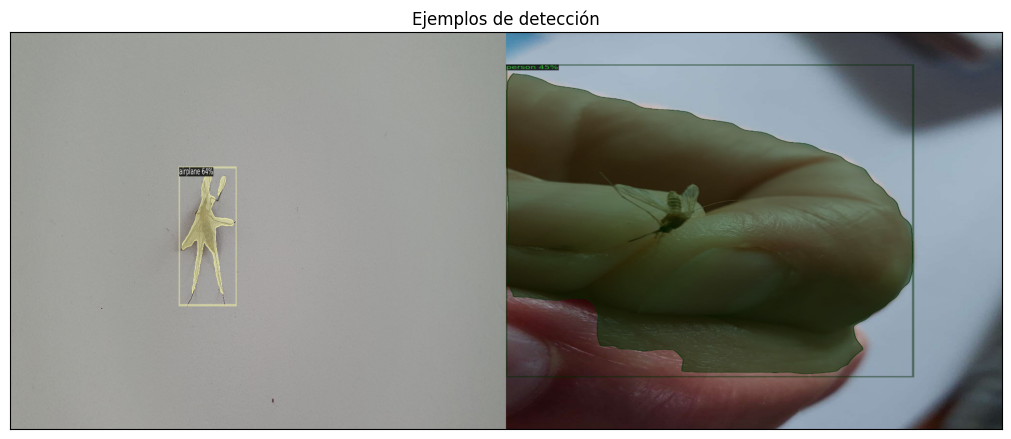

In [ ]:
# Vamos a cargar una imagen del dataset y a pasarla por el predictor

ejemplo1 = readIm(get_image('Files/Culex/0e4a3374-a618-4e8e-b91d-67a59b078bdc.jpg'),1)
ejemplo2 = readIm(get_image('Files/Culex/0a1421c4-d281-4402-901d-fb090c7fc83f.jpg'),1)

outputs1 = predictor(ejemplo1)
outputs2 = predictor(ejemplo2)

# We can use `Visualizer` to draw the predictions on the image.
v1 = Visualizer(ejemplo1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
v2 = Visualizer(ejemplo2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)

out1 = v1.draw_instance_predictions(outputs1["instances"].to("cpu"))
out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))

resized1 = cv2.resize(out1.get_image()[:, :, ::-1], (1000,800))
resized2 = cv2.resize(out2.get_image()[:, :, ::-1], (1000,800))
displayMI_ES([resized1, resized2], "Ejemplos de detección")

En estos ejemplos, se puede apreciar cómo podemos aprovecharnos de las circunstancias mencionadas para identificar las regiones con mosquitos. En el primer caso, el modelo confunde al mosquito con un avión. En el segundo, el modelo detecta la mano de la persona y el mosquito queda dentro de la caja. Podemos obtener las coordenadas de las cajas detectadas y recortar la imágenes. Por ejemplo:

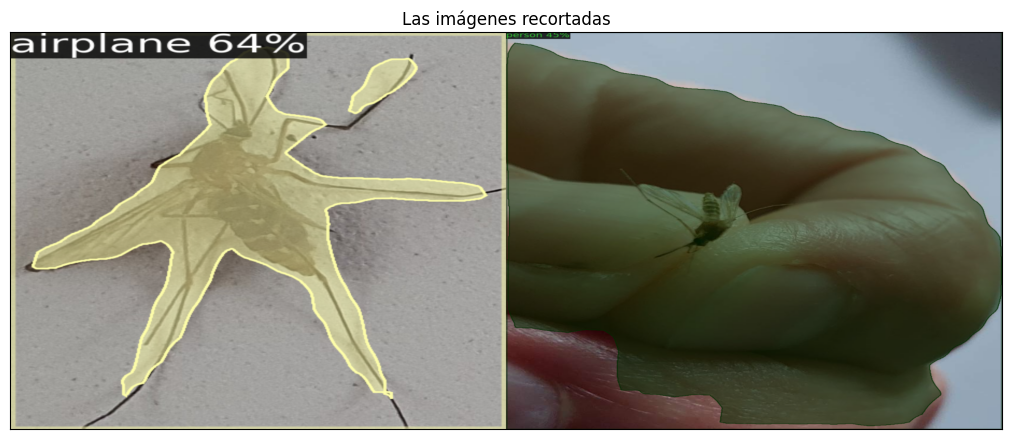

In [ ]:
boxes1 = outputs1["instances"].pred_boxes.tensor.cpu().numpy()
boxes2 = outputs2["instances"].pred_boxes.tensor.cpu().numpy()

x_min1, y_min1, x_max1, y_max1 = boxes1[0]
x_min2, y_min2, x_max2, y_max2 = boxes2[0]

# Recortar la región de interés (ROI) de la imagen original
cropped_image1 = out1.get_image()[:, :, ::-1][int(y_min1):int(y_max1), int(x_min1):int(x_max1)]
cropped_image2 = out2.get_image()[:, :, ::-1][int(y_min2):int(y_max2), int(x_min2):int(x_max2)]

cropped_image1 = cv2.resize(cropped_image1, (1000,800))
cropped_image2 = cv2.resize(cropped_image2, (1000,800))

displayMI_ES([cropped_image1, cropped_image2], "Las imágenes recortadas")

En estos ejemplos, se ve el borde de la caja y la máscara de segmentación. Para no incluir esto en los recortes finales, basta con no realizar el dibujo de las cajas sobre las imágenes.

# ¿Cómo recortar las imágenes de forma efectiva?

Detectron2 no fue entrenado para detectar mosquitos. Aunque ya hemos visto que puede servirnos para algunos ejemplos, ¿realmente podemos confiar en que ofrezca buenos resultados sobre el dataset completo?

A pesar de las dos mencionadas circunstancias que nos permiten realizar algunos buenos recortes en los ejemplos, no podemos confiar ciegamente en que todos los mosquitos serán confundidos con aviones o pájaros o que estarán siempre situados encima de manos y se recotarán adecuadamente.

## Qué pasa si perceptron2 no detecta o no confunde al mosquito con otra clase.



Debido a que los mosquitos no están contemplados como una clase para el perceptron2, es razonable pensar que habrá imágenes en las que estos no se detecten. De hecho, es algo que ocurre a menudo.

Lo que queremos que suceda es que la Region Proposal Network obtenga las zonas con mosquitos y que luego el clasificador confunda a los mosquitos con otras clases. Para facilitar esta situación, podemos bajar el umbral de confianza del modelo para que no descarte las cajas de aquellos objetos para los cuales no está muy seguro de su etiqueta. Sin embargo, esto conlleva el riesgo de que consideremos también cajas para otras regiones que no son las que nos interesan. Y debido a que ninguna estará etiquetada como "mosquito", será complicado saber cuál de las regiones es la que nos conviene para cada ejemplo. Por ello, es importante dar con un valor adecuado para el umbral de confianza.

[01/13 17:56:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[01/13 17:56:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[01/13 17:56:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


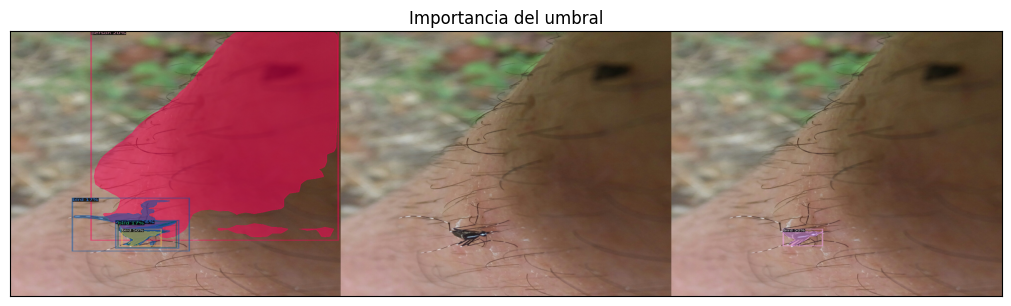

In [ ]:
# Vamos a realizar un experimento en el que se ve qué pasa si el umbral
# es demasiado alto o bajo

# Cogemos una imagen
original = readIm(get_image('Files/Aedes_albopictus/0de26495-e233-4937-80f7-ed453adfb752.jpg'),1)

# Realizamos predicciones con diferentes umbrales

# Umbral muy bajo
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.15
predictor = DefaultPredictor(cfg)

outputs = predictor(original)

v = Visualizer(original[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

resized1 = cv2.resize(out.get_image()[:, :, ::-1], (1000,800))

# Umbral muy alto
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9
predictor = DefaultPredictor(cfg)

outputs = predictor(original)

v = Visualizer(original[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

resized2 = cv2.resize(out.get_image()[:, :, ::-1], (1000,800))

# Umbral equilibrado
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4
predictor = DefaultPredictor(cfg)

outputs = predictor(original)

v = Visualizer(original[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

resized3 = cv2.resize(out.get_image()[:, :, ::-1], (1000,800))

displayMI_ES([resized1, resized2, resized3], "Importancia del umbral")

Podemos ver que si el umbral es demasiado bajo (izquierda), se etiquetan muchas regiones en la imagen, pero si es demasiado alto (centro), no se etiqueta nada. Debido a que la clase mosquito no existe, estamos obligados a ser bastante laxos con el umbral de confianza. Haciendo experimentos como el de arriba, hemos obtenido el valor de 0.4, que parece ser un equilibrio bastante bueno entre ambos extremos (derecha).

Gracias a tener un buen umbral, conseguimos minimizar la cantidad de ejemplos en los que no se detecta nada al mismo tiempo que reducimos al mínimo la cantidad de regiones propuestas .

## Cómo discriminar entre regiones si se proponen varias.

Con un buen umbral establecido, podemos maximizar la cantidad de veces que el perceptron2 "se equivoca a nuestro favor". Aún así, ocurre con frecuencia que se detecta más de una región de interés para las imágenes. Es importante que podamos quedarnos con un solo recorte (que debería ser el que contenga al mosquito). Para ello, debemos diseñar algún criterio que nos permita discriminar entre las cajas propuestas por el modelo.

Vamos a usar un criterio heurístico que hemos diseñado en en base a los resultados empíricos obtenidos de la experimentación con el modelo. Hemos visto que:
1. El modelo suele etiquetar a los mosquitos como pájaros (más adelante se detallarán estas estadísticas).
2. Cuando no se detecta un pájaro, el mosquito suele estar en la caja que se ha etiquetado con mayor confianza (independientemente de su clase). Esto se debe a que las fotos están hechas especificamente a los mosquitos, por lo que es más probable que la Region Proposal Network cree una caja para ellos. El etiquetador es más propenso a etiquetar con más confianza estas zonas porque las otras regiones suelen tener "información más difusa", ya que son zonas secundarias de la imagen.

Teniendo esto en cuenta, seguiremos estos pasos para recortar una imagen:
1. El modelo creará y etiquetará las regiones que encuentre.
2. De entre las cajas detectadas, nos quedaremos con la que se etiquete como pájaro.
3. Si no la hubiera, nos quedamos con la que se etiquete con mayor confianza.

Otro punto a favor de quedarnos con la región de mayor confianza es la otra circunstancia que comentábamos antes: el hecho de que muchas imágenes son de manos de personas con el mosquito encima. Mask R-CNN sí detecta con una precisión razonable las manos de las personas. Si no hay una caja etiquetada como pájaro, es posible que sí haya una etiquetada como persona que contenga al mosquito. Dichas cajas tendrán gran confianza habitualmente porque el modelo sí sabe detectarlas.

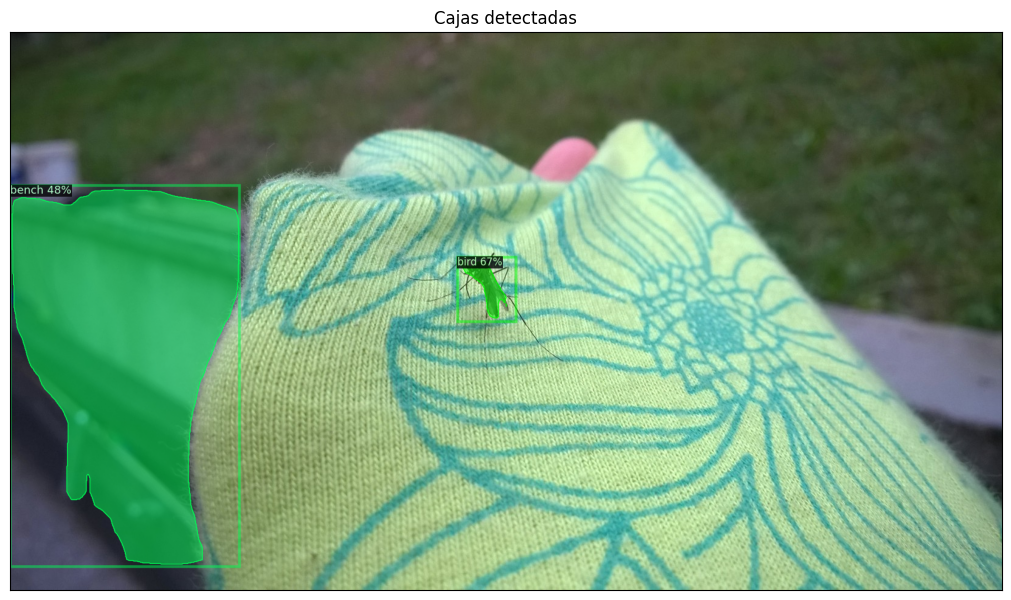

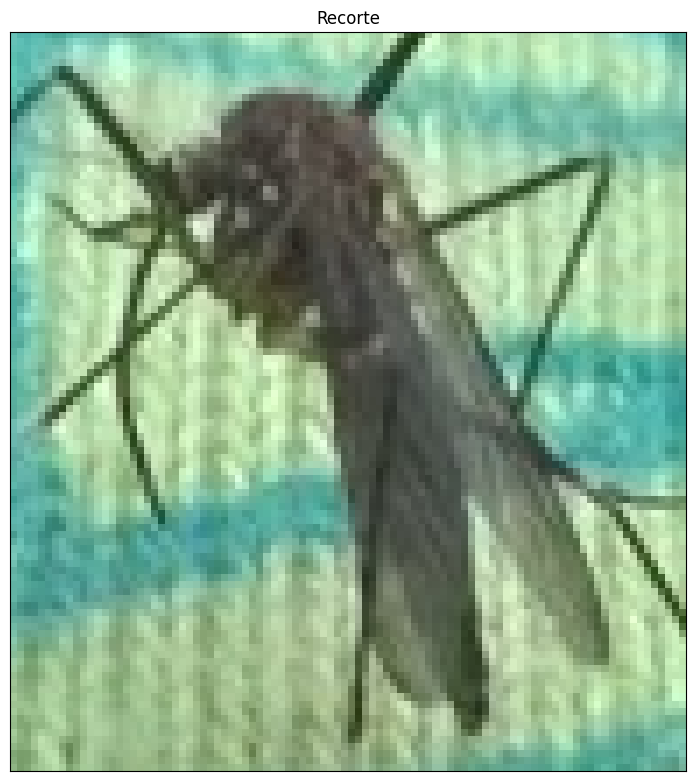

In [ ]:
# Cargamos un ejemplo
im = readIm(get_image('Files/Japonicus+koreicus/Copia de 2afe7895-2aa9-4740-9177-5320f80e531e.jpg'),1)

# Predicción
outputs = predictor(original)

boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
classes = outputs["instances"].pred_classes.cpu().numpy()

# Iteramos sobre las cajas detectadas. Nos quedamos con la etiquetada como pájaro
# Si no hay, nos quedamos con la primera (que es la de mayor confianza)
i = 0
while i < len(classes) and classes[i] != 14: # 14 es la etiqueta de pájaro
  i += 1

if i >= len(classes):
  i = len(classes)-1

# Si no detecto un pájaro, vuelvo a la primera caja
if classes[i] != 14:
  i = 0

x_min, y_min, x_max, y_max = boxes[i]

# Recortar la región de interés (ROI) de la imagen original
cropped_image = im[int(y_min):int(y_max), int(x_min):int(x_max)]

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

#La imagen completa con las predicciones
displayIm(out.get_image()[:, :, ::-1], "Cajas detectadas")

#El recorte final
displayIm(cropped_image, "Recorte")

Hemos conseguido recortar correctamente al mosquito. En este caso, cualquiera de los dos criterios heurísticos que habíamos definido hubiera servido, ya que el mosquito ha sido clasificado como pájaro y encima ha sido la región con más confianza etiquetada.

# Procedimiento final de recorte

Esta celda de texto recorta todas las imágenes de una carpeta concreta y las vuelca en un directorio de salida. Puede tardar unos 12-17 minutos para los directorios con más de 1000 imágenes.

In [ ]:
# Ruta a la carpeta de imágenes en Google Drive
folder_path = '/content/drive/MyDrive/VC_FINAL/Files/Culex/'
# Crear la carpeta de salida si no existe
output_folder = '/content/drive/MyDrive/VC_FINAL/Files/Culex_segmentadas'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Obtener las imágenes
image_paths = [folder_path + f for f in sorted(os.listdir(folder_path))]

#Estadísticas de la detección
clases_detectadas = np.zeros(len(all_classes))
#print(len(clases_detectadas))
ncajas = 0

# Procesar cada imagen
for image_path in image_paths:
    # Cargar la imagen
    image = cv2.imread(image_path)

    if image is None:
      print("detectado error en:", image_path)

    else:
      # Realizar la predicción
      outputs = predictor(image)

      # Obtener las cajas y sus clases
      boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
      classes = outputs["instances"].pred_classes.cpu().numpy()

      if len(boxes) > 0:
        # La clase que mejor aproxima a los mosquitos es la de los pájaros (14)
        # Por tanto, me quedo con la primera caja que es un pájaro (si la hubiera)
        i = 0
        while i < len(classes) and classes[i] != 14:
          i += 1

        if i >= len(classes):
          i = len(classes)-1
          #print("se superó el nº de cajas, volviendo a la anterior", image_path)

        # Si al final no se detectó un "pájaro", lo mejor es quedarse con la primera
        # caja que se encontró
        if classes[i] != 14:
          i = 0

        #if i > 0:
        #  print("se descartó alguna caja", image_path)

        box = boxes[i]
        x_min, y_min, x_max, y_max = box

        #ncajas += 1 + i
        clases_detectadas[classes[i]] += 1

        # Recortar la región de interés (ROI) de la imagen original
        cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]

        # Guardar la imagen recortada en la carpeta correspondiente
        output_path = os.path.join(output_folder, os.path.basename(image_path))
        cv2.imwrite(output_path, cropped_image)

        # Visualizar la imagen recortada
        #if len(classes) > 0:
        #  v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
        #  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        #  cv2_imshow(out.get_image()[:, :, ::-1])
        #  cv2_imshow(cropped_image)
      #else:
      #  print("No se encontraron cajas en", image_path)

#print(ncajas, clases_detectadas)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# Resultados finales y conclusiones

Hemos visto que Mask R-CNN es una herramienta muy poderosa para la detección de objetos. El dataset concreto al que nos enfrentábamos presentaba el reto de tener que detectar mosquitos sin tener un modelo especificamente diseñado para ello. Sin embargo, hemos podido comprobar que, ajustando cuidadosamente el umbral de confianza y conociendo bien la naturaleza de las imágenes del dataset, se pueden conseguir resultados interesantes.

Estas son las estadísticas de clases detectadas y de imágenes en las que se ha encontrado algo del modelo final:


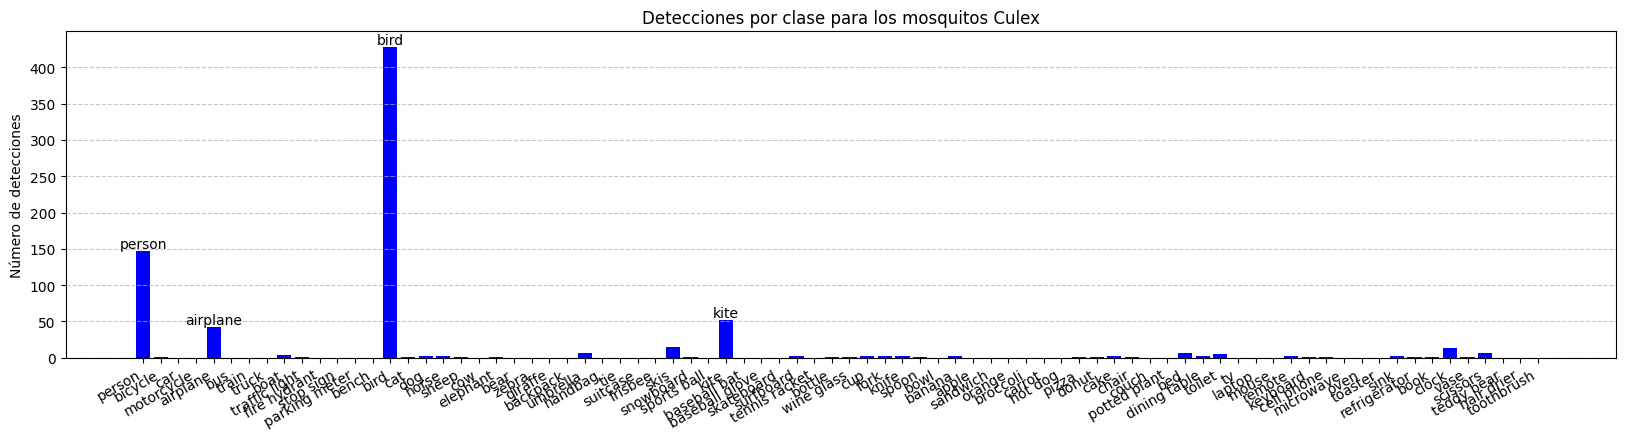

In [ ]:
import matplotlib.pyplot as plt

# detecciones por clase en mosquitos Culex

fig, ax = plt.subplots()

fig.set_figwidth(20)

# Crear el gráfico de barras
barras = ax.bar(all_classes, clases_detectadas, color='blue')

# Añadir etiquetas y título
ax.set_ylabel('Número de detecciones')
ax.set_title('Detecciones por clase para los mosquitos Culex')
fig.autofmt_xdate()

# Añadir el texto de encima de las barras
for barra, etiqueta in zip(barras, all_classes):
    yval = barra.get_height()
    if(yval > 15):
      plt.text(barra.get_x() + barra.get_width()/2, yval, etiqueta, ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

En general, podemos ver que se consigue recortar un 75% de los ejemplos de cada clase. Dentro de estos ejemplos que se han conseguido recortar, aproximadamente el 75% está bien recortado. Esta última estadística es más difícil de medir, puesto que habría que evaluar manualmente cada uno de los recortes para cada clase de mosquito.

Por tanto, de cada 100 ejemplos, estamos consiguiendo 75 recortes, de los cuales 56 son de calidad. Por tanto, todo se reduce a si es mejor la calidad o la cantidad en el conjunto de datos. Debido a que el dataset original tampoco es demasiado grande, no es fácil lanzar una hipótesis de qué es más valioso en este caso, así que tendremos que esperar a los experimentos con los modelos de clasificación para poder acabar de evaluar los resultados del proceso de recorte.